# Bollinger Band Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housingFin.csv',index_col=0)
print(data.shape)
print(data.head())

(1043, 7)
                   Open         High          Low        Close    Volume  \
Date                                                                       
2015-01-01  1083.643516  1083.643516  1070.742998  1073.562000   36260.0   
2015-01-02  1073.131983  1124.638495  1073.131983  1119.764966   91131.0   
2015-01-05  1125.689649  1126.645243  1099.936392  1105.287718   49817.0   
2015-01-06  1096.066237  1098.933019  1046.375353  1053.494527  117772.0   
2015-01-07  1055.596834  1065.630570  1047.760964  1051.201102  110656.0   

            Adjustment Factor  Adjustment Type  
Date                                            
2015-01-01                NaN              NaN  
2015-01-02                NaN              NaN  
2015-01-05                NaN              NaN  
2015-01-06                NaN              NaN  
2015-01-07                NaN              NaN  


In [3]:
data = data.drop(['Adjustment Type','Adjustment Factor','Volume'],axis=1)
data.head()

,Open,High,Low,Close
Date,,,,
2015-01-01,1083.643516,1083.643516,1070.742998,1073.562000
2015-01-02,1073.131983,1124.638495,1073.131983,1119.764966
2015-01-05,1125.689649,1126.645243,1099.936392,1105.287718
2015-01-06,1096.066237,1098.933019,1046.375353,1053.494527
2015-01-07,1055.596834,1065.630570,1047.760964,1051.201102


## Analysing data for 1043 days

In [4]:
mean_10 = data['Close'].rolling(10).mean()
std_dev_10 = (data['Close'].rolling(10).var())**0.5

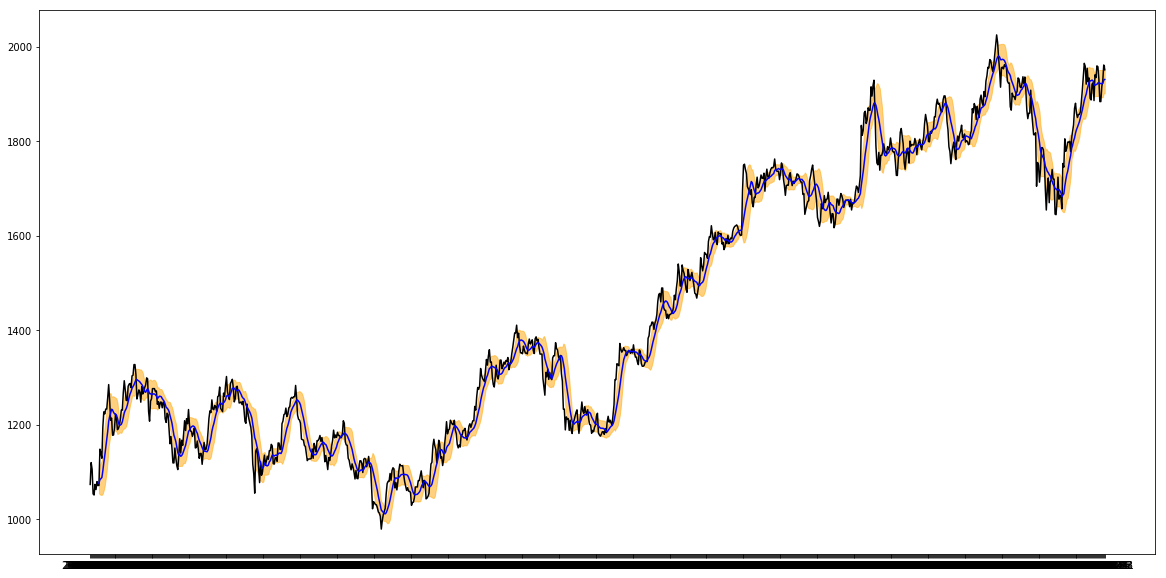

In [5]:
plt.figure(figsize=(20,10))
plt.plot(data.index,data['Close'],color='black')
plt.plot(data.index,mean_10,color='blue')
plt.fill_between(data.index,mean_10+std_dev_10,mean_10-std_dev_10,color='orange',alpha=0.5)
plt.show()

In [6]:
profit = 0
upper_band = mean_10+std_dev_10
lower_band = mean_10-std_dev_10

buy_price = 0
sell_price = 0

buy = True
first = True

for index,x in enumerate(data['Close'][20:]):
    if first and x>upper_band[index-1]:
        first = False
        sell_price = x
        buy = True
        continue
        
    if first and x<lower_band[index-1]:
        first = False
        buy_price = x
        buy = False
        continue
        
    if not buy and x>upper_band[index-1]:
        profit += x-buy_price
        sell_price = x
        buy = True
    elif buy and x<lower_band[index-1]:
        profit += sell_price-x
        buy_price = x
        buy = False
        
print(profit)

-281.5110260000008


## Analysing smaller time span of 200 days

In [7]:
data_small = data[:200]

In [8]:
mean_10_small = data_small['Close'].rolling(10).mean()
std_dev_10_small = (data_small['Close'].rolling(10).var())**0.5

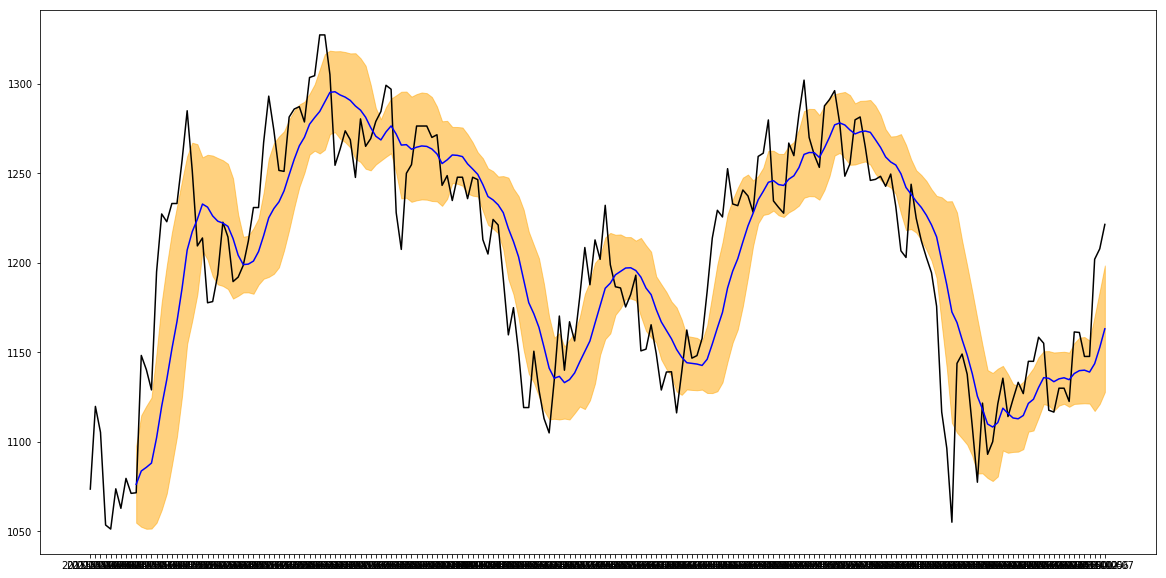

In [11]:
plt.figure(figsize=(20,10))
plt.plot(data_small.index,data_small['Close'],color='black')
plt.plot(data_small.index,mean_10_small,color='blue')
plt.fill_between(data_small.index,mean_10_small+std_dev_10_small,mean_10_small-std_dev_10_small,color='orange',alpha=0.5)
plt.show()

In [16]:
profit = 0
upper_band = mean_10_small+std_dev_10_small
lower_band = mean_10_small-std_dev_10_small

buy_price = 0
sell_price = 0

buy = True
first = True

for index,x in enumerate(data_small['Close'][20:]):
    if first and x>upper_band[index-1]:
        first = False
        sell_price = x
        buy = True
        continue
        
    if first and x<lower_band[index-1]:
        first = False
        buy_price = x
        buy = False
        continue
        
    if not buy and x>upper_band[index-1]:
        profit += x-buy_price
        sell_price = x
        buy = True
    elif buy and x<lower_band[index-1]:
        profit += sell_price-x
        buy_price = x
        buy = False
       
print(profit)

83.66455800000017


## Iterating over window sizes for maximum profit

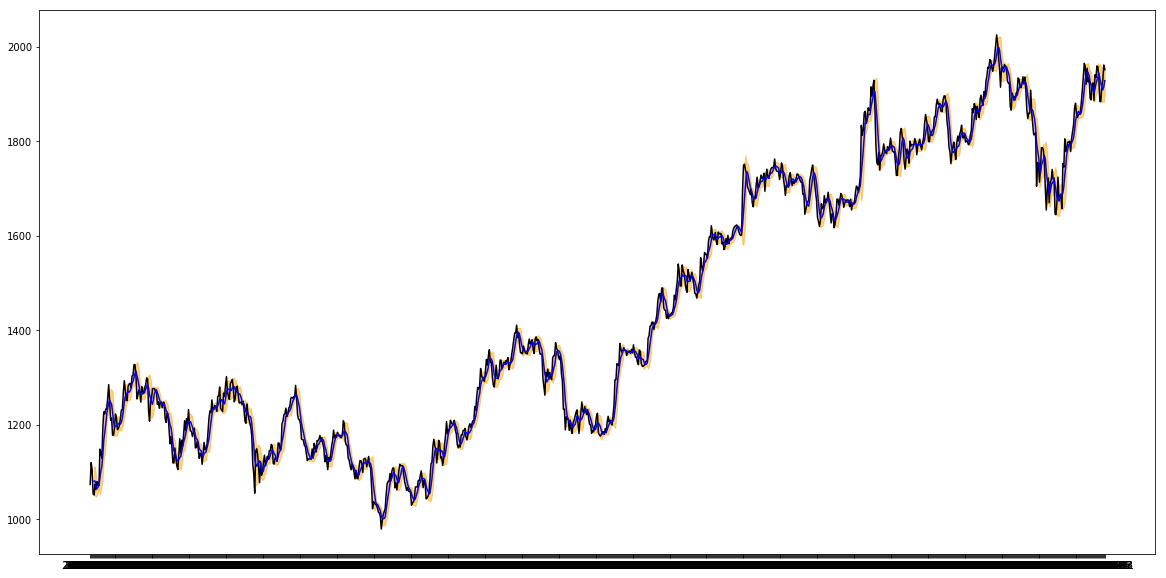

-401.9865840000009 5


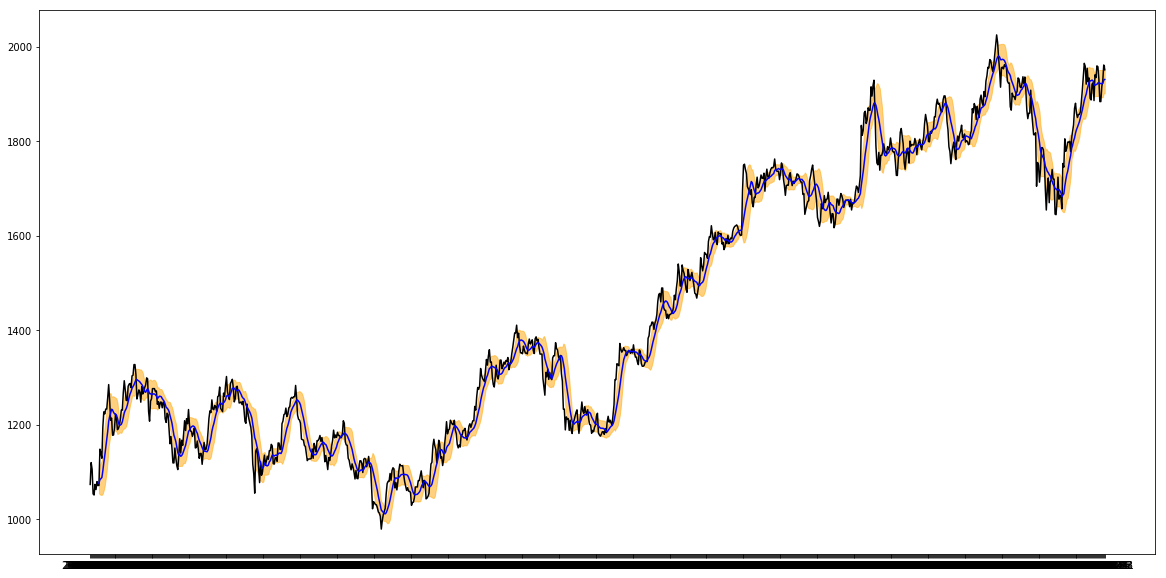

-281.5110260000008 10


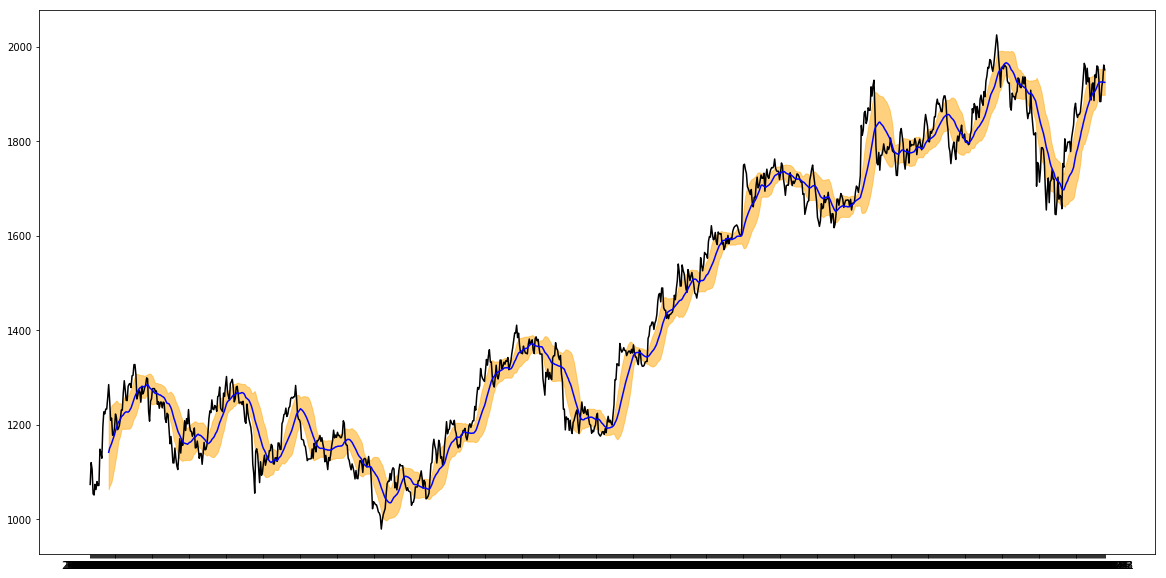

-287.1796470000006 20


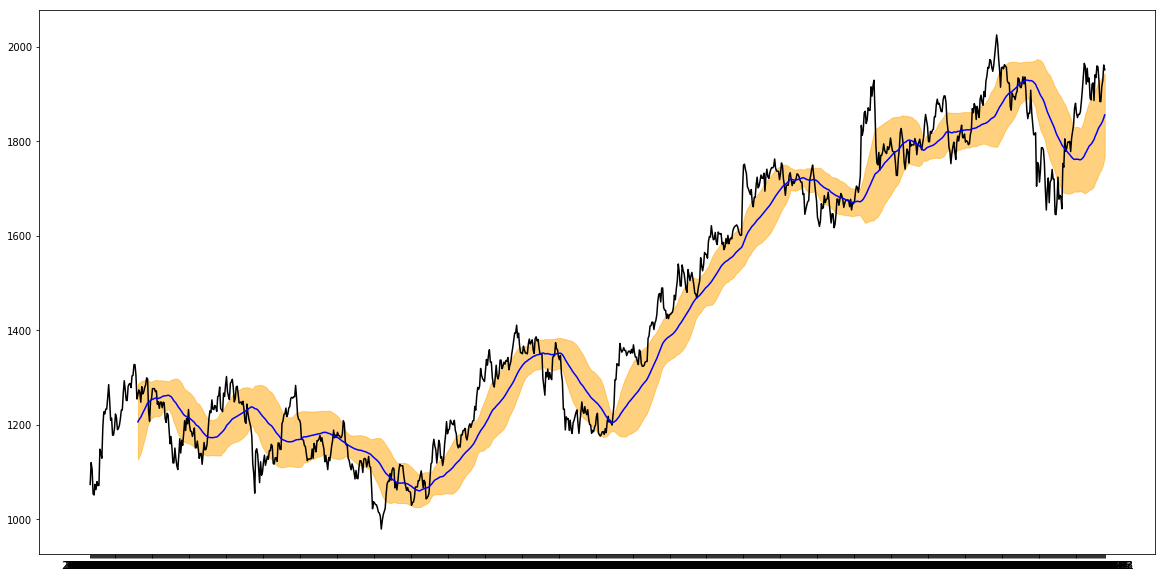

465.6064679999995 50


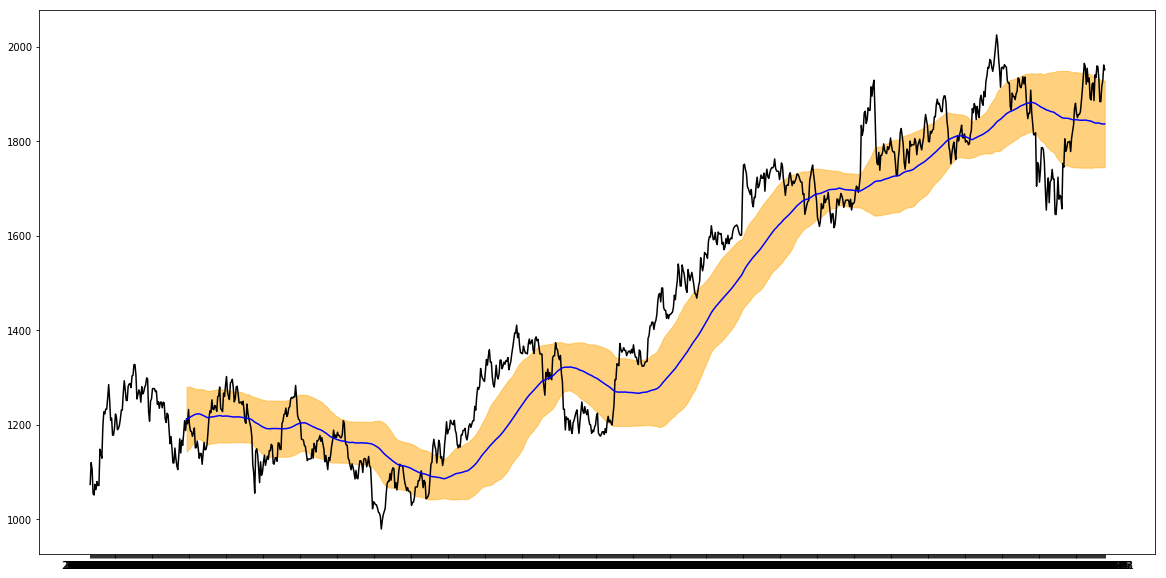

1031.5574529999992 100
416.7544662952423


In [19]:
import time
start = time.time()
window = [5,10,20,50,100]

for win in window:
    mean_i = data['Close'].rolling(win).mean()
    std_dev_i = (data['Close'].rolling(win).var())**0.5
    
    plt.figure(figsize=(20,10))
    plt.plot(data.index,data['Close'],color='black')
    plt.plot(data.index,mean_i,color='blue')
    plt.fill_between(data.index,mean_i+std_dev_i,mean_i-std_dev_i,color='orange',alpha=0.5)
    plt.show()
    
    profit = 0
    upper_band = mean_i+std_dev_i
    lower_band = mean_i-std_dev_i

    buy_price = 0
    sell_price = 0

    buy = True
    first = True

    for index,x in enumerate(data['Close'][20:]):
        if first and x>upper_band[index-1]:
            first = False
            sell_price = x
            buy = True
            continue

        if first and x<lower_band[index-1]:
            first = False
            buy_price = x
            buy = False
            continue

        if not buy and x>upper_band[index-1]:
            profit += x-buy_price
            sell_price = x
            buy = True
        elif buy and x<lower_band[index-1]:
            profit += sell_price-x
            buy_price = x
            buy = False
        
    print(profit,win)
    
print(time.time()-start)

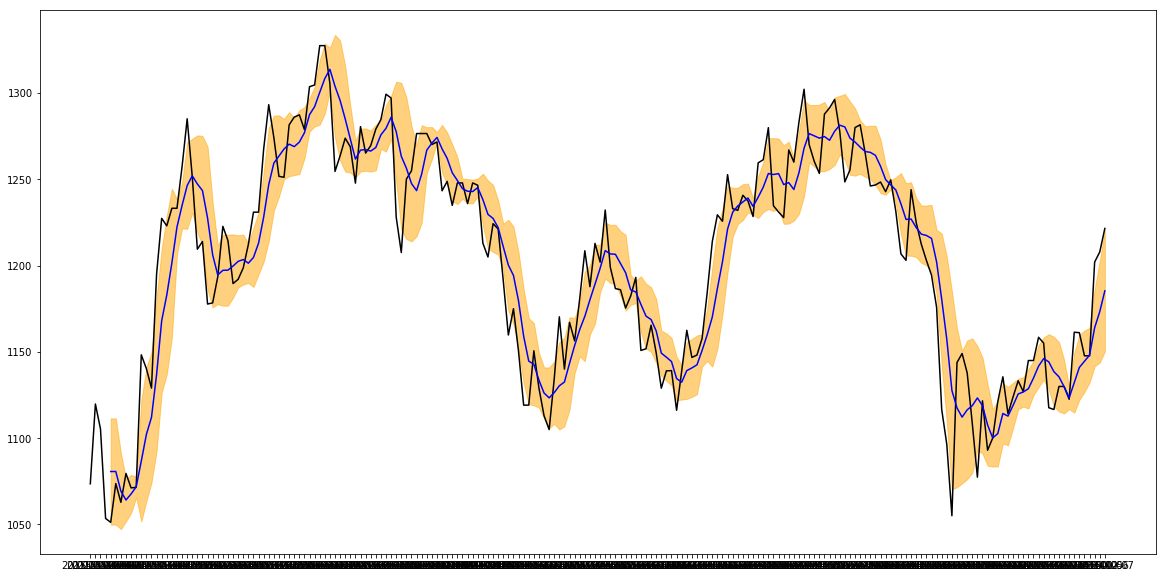

155.87033500000007 5


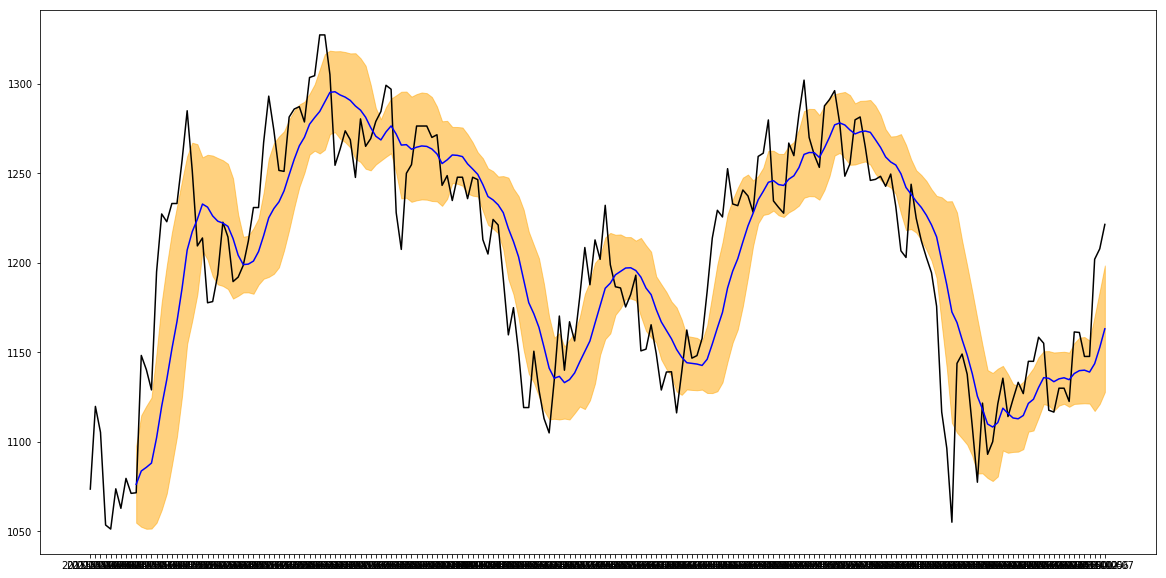

83.66455800000017 10


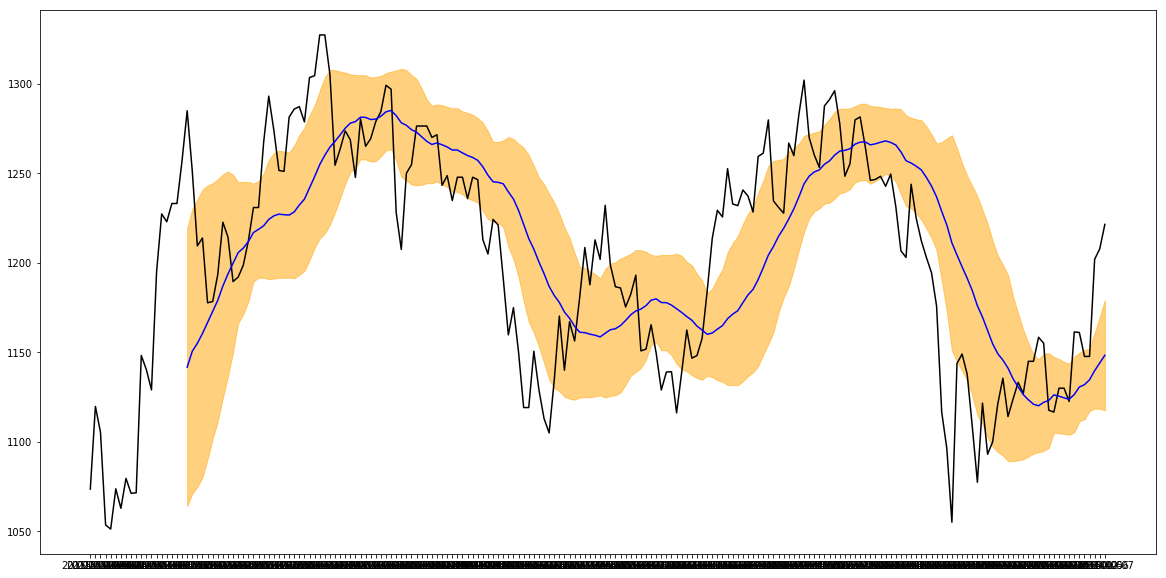

24.856804000000693 20


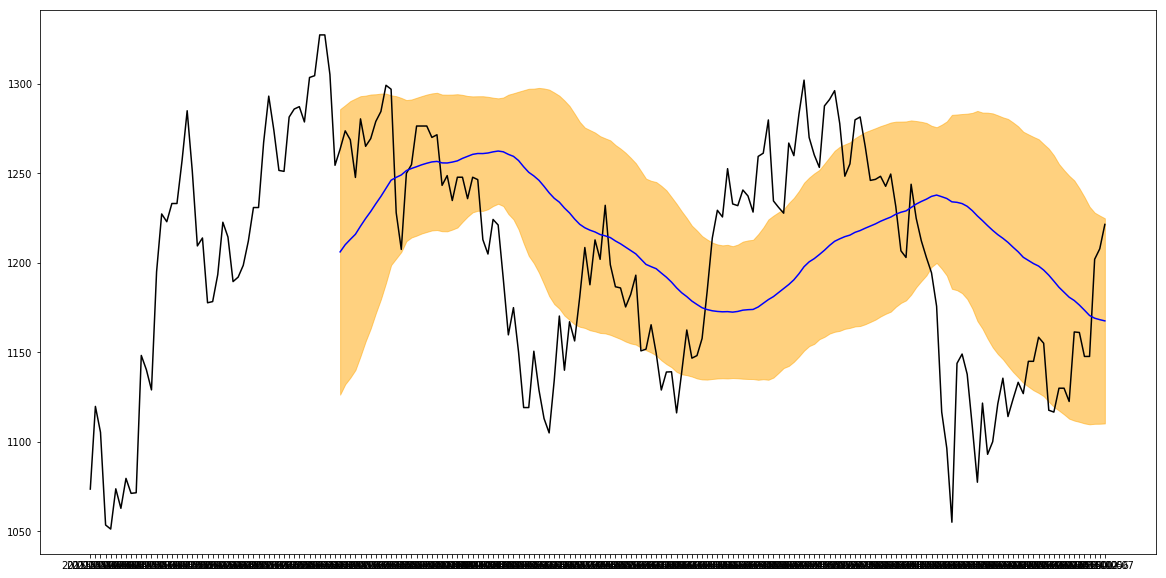

271.2368920000001 50


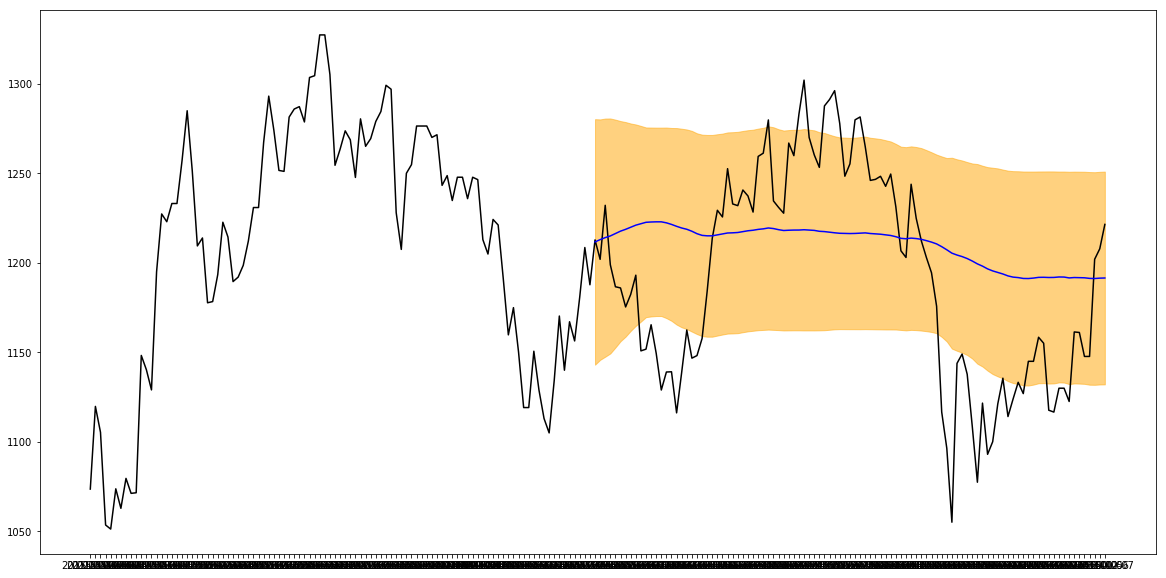

134.76844800000003 100


In [22]:
window = [5,10,20,50,100]

for win in window:
    mean_i = data_small['Close'].rolling(win).mean()
    std_dev_i = (data_small['Close'].rolling(win).var())**0.5
    
    plt.figure(figsize=(20,10))
    plt.plot(data_small.index,data_small['Close'],color='black')
    plt.plot(data_small.index,mean_i,color='blue')
    plt.fill_between(data_small.index,mean_i+std_dev_i,mean_i-std_dev_i,color='orange',alpha=0.5)
    plt.show()
    
    profit = 0
    upper_band = mean_i+std_dev_i
    lower_band = mean_i-std_dev_i

    buy_price = 0
    sell_price = 0

    buy = True
    first = True

    for index,x in enumerate(data_small['Close'][20:]):
        if first and x>upper_band[index-1]:
            first = False
            sell_price = x
            buy = True
            continue

        if first and x<lower_band[index-1]:
            first = False
            buy_price = x
            buy = False
            continue

        if not buy and x>upper_band[index-1]:
            profit += x-buy_price
            sell_price = x
            buy = True
        elif buy and x<lower_band[index-1]:
            profit += sell_price-x
            buy_price = x
            buy = False
        
    print(profit,win)

Max profit for the smaller dataset is achieved for a window size of 50 days and that for the larger dataset is achieved for a window size of 100 days. Though the 100 day window performs fairly well in both the cases.